In [1]:
#Dataset and libraries import
import numpy as np
import pandas as pd
data=pd.read_csv(r"C:\Users\vamshi krishna\Downloads\archive (1)\Mall_Customers.csv")

In [2]:
#Printing the first few entries of data
print("\nThe first few rows of the dataset are:")
data.head()


The first few rows of the dataset are:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Printing the last few entries of data
print("The last few entries of the dataset are:")
data.tail()

The last few entries of the dataset are:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
#Printing the summary statistics
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
#Print the information about the dataset
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
print(data.shape)

(200, 5)


In [7]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [8]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
print(data.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [10]:
#Outlier removal with the help of interquartlie range
import pandas as pd
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1
    
    # Define bounds for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]
    
    return data_cleaned

print("Original Dataset:")
print(data)

# Remove outliers
data = remove_outliers_iqr(data)

print("\nDataset after removing outliers:")
print(data)

Original Dataset:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

Dataset after removing outliers:
     CustomerID  Gender  Age  Annual Income (k$)

C:\Users\vamshi krishna\AppData\Local\Temp\ipykernel_7976\4282341342.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\vamshi krishna\AppData\Local\Temp\ipykernel_7976\4282341342.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\vamshi krishna\AppData\Local\Temp\ipykernel_7976\4282341342.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_cleaned = data[~((data < lower_bound) | (data > upper_

In [11]:
# Select only the numeric features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [12]:
#Print the datatypes of features and target
print("\nData types of features: ")
print(X.dtypes)


Data types of features: 
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object


In [13]:
#Data standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

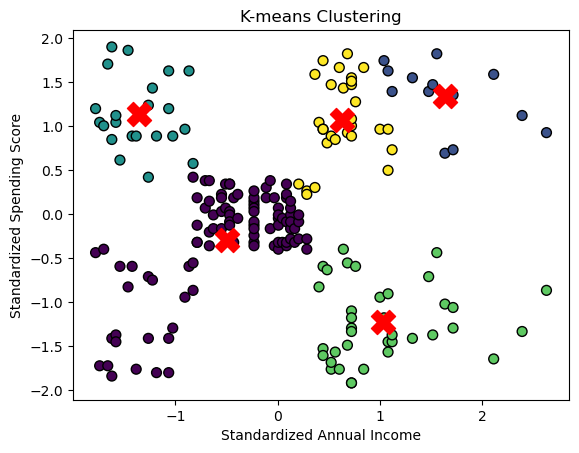

In [14]:
# 1. K-means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='black', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-means Clustering")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()

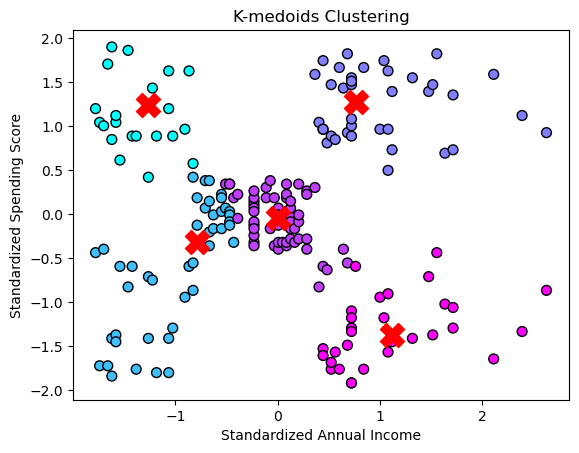

In [15]:
# 2. K-medoids Clustering
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=5, random_state=42)
kmedoids_labels = kmedoids.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids_labels, cmap='cool', edgecolor='black', s=50)
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='red',marker='X')
plt.title("K-medoids Clustering")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()

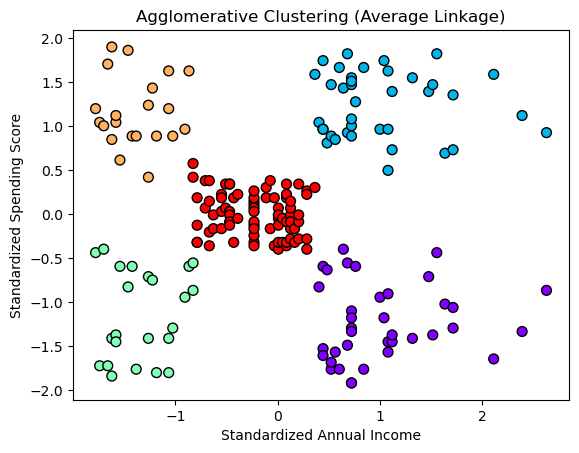

In [16]:
# 3. Agglomerative Clustering 
from sklearn.cluster import AgglomerativeClustering
agglo_average = AgglomerativeClustering(n_clusters=5, linkage='average')
average_labels = agglo_average.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=average_labels, cmap='rainbow', edgecolor='black', s=50)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()

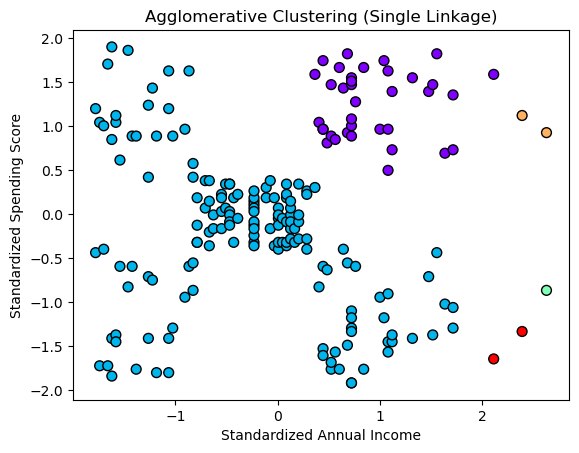

In [17]:
# 3. Agglomerative Clustering 
from sklearn.cluster import AgglomerativeClustering
agglo_average = AgglomerativeClustering(n_clusters=5, linkage='single')
average_labels = agglo_average.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=average_labels, cmap='rainbow', edgecolor='black', s=50)
plt.title("Agglomerative Clustering (Single Linkage)")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()

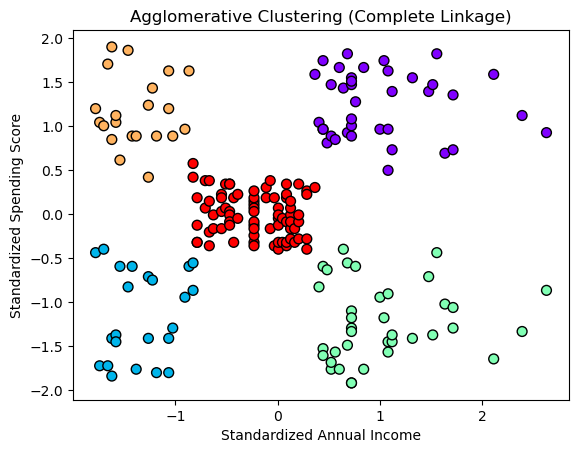

In [18]:
# 3. Agglomerative Clustering 
from sklearn.cluster import AgglomerativeClustering
agglo_average = AgglomerativeClustering(n_clusters=5, linkage='complete')
average_labels = agglo_average.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=average_labels, cmap='rainbow', edgecolor='black', s=50)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()

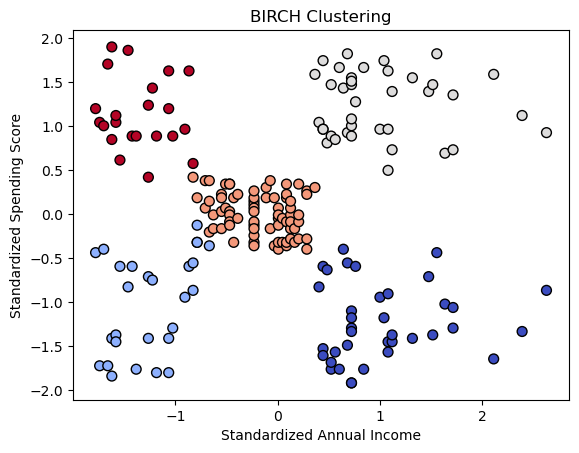

In [19]:
# 4. BIRCH Clustering
from sklearn.cluster import Birch
birch = Birch(n_clusters=5)
birch_labels = birch.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=birch_labels, cmap='coolwarm', edgecolor='black', s=50)
plt.title("BIRCH Clustering")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()

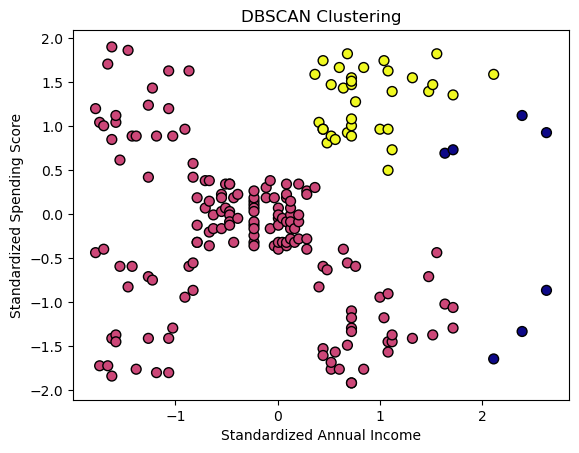

In [20]:
# 5. DBSCAN Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='plasma', edgecolor='black', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()

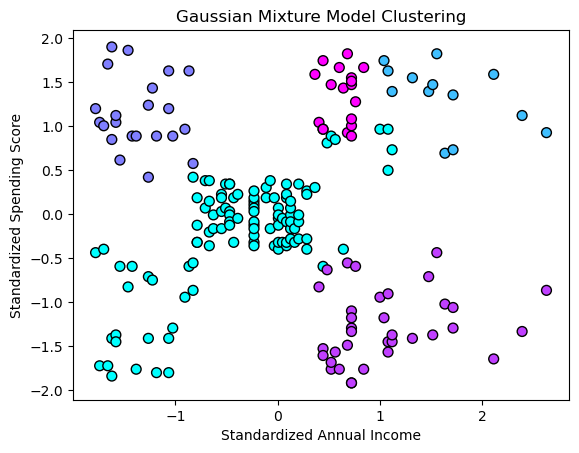

In [21]:
# 6. Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='cool', edgecolor='black', s=50)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()

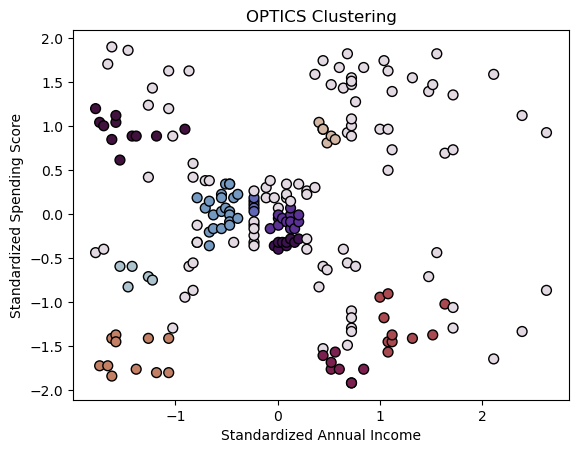

In [22]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=optics_labels, cmap='twilight', edgecolor='black', s=50)
plt.title("OPTICS Clustering")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()

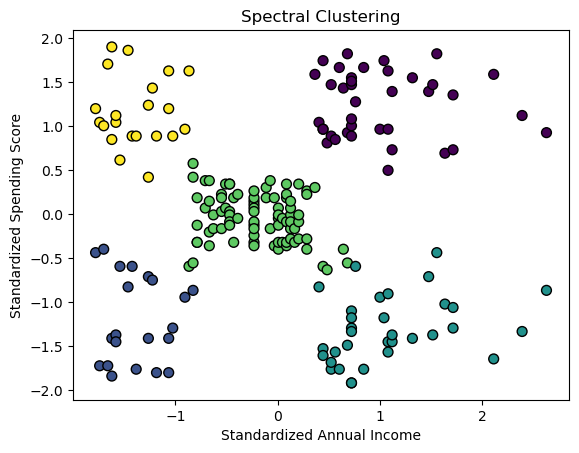

In [23]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=5, assign_labels='discretize', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=spectral_labels, cmap='viridis', edgecolor='black', s=50)
plt.title("Spectral Clustering")
plt.xlabel("Standardized Annual Income")
plt.ylabel("Standardized Spending Score")
plt.show()